## 0. Предварительные действия

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
DATA_DIR = 'D:/Python/IDE/project_3/data'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
# Подгрузим наши данные из соревнования

#DATA_DIR = '/kaggle/input/sf-booking/'
#df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
#df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [10]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

hotels = pd.concat([df_test, df_train], sort=False).reset_index(drop=True) # объединяем

In [13]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

## 1. Базовая проверка качества датасета

In [15]:
# Ищем выводим колонки с пропуском
cols_null_percent = hotels.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
print(cols_with_null)

lat    0.633655
lng    0.633655
dtype: float64


In [16]:
# Временно заполняем нулями, но мы ещё вернёмся к этому
hotels['lat'] = hotels['lat'].fillna(0)
hotels['lng'] = hotels['lng'].fillna(0)

In [17]:
# Сводка уникальных значений, разбираемся, что у нас будет категориальным признаком
hotels.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

In [18]:
# Ищем дубликаты
dupl_col=list(hotels.columns)
mask=hotels.duplicated(subset=dupl_col)
data_doubles=hotels[mask]
data_doubles.shape
# В таблице имеется 336 дубликатов. Однако, по условиям задачи удалять строки нельзя, так что пока оставим как есть.

(336, 18)

## 2. Работаем со столбцами

In [19]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

### hotel_address

In [20]:
# Работаем с адресом отеля (страна)
import pycountry
countries = {c.name for c in pycountry.countries} | {c.official_name for c in pycountry.countries if hasattr(c, "official_name")} | {c.alpha_3 for c in pycountry.countries} | {c.alpha_2 for c in pycountry.countries}

def extract_country(address):
    for country in countries:
        if address.endswith(country):
            return country
    return None

# Применяем к колонке
hotels["country"] = hotels["hotel_address"].apply(extract_country)

In [21]:
# Смотрим, что получилось
hotels.country.value_counts()
# Получилось немного стран, попробуем выделить города

country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: count, dtype: int64

In [22]:
# вытаскиваем город из адреса
def extract_city(addr):
    parts = addr.split()
    if parts[-2:] == ['United', 'Kingdom']:
        return parts[-5]  # для UK формаат адреса город код код United Kingdom
    else:
        return parts[-2]  # для всех остальных город перед страной

# Создаем признак city
hotels["city"] = hotels["hotel_address"].apply(extract_city)


In [23]:
hotels['city'].value_counts()

city
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64

Пользы нет - в датасете все гостиницы из одной страны находятся в одном городе. Пока не удаляем - используем эти данные для лучшего заполнения координат

### Дата ревью

In [24]:
#Преобразуем в datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'], dayfirst=True, errors='coerce')

# Создаём признаки год, месяц, день недели и является ли день выходным. Дата будет очевидно не информативным признаком, вместо неё берём день недели
# и статус выходного (теория - "платные" накрутки чаще происходят в будний день)
hotels['year'] = hotels['review_date'].dt.year
hotels['month'] = hotels['review_date'].dt.month
hotels['dayofweek'] = hotels['review_date'].dt.weekday  # 0 = понедельник, 6 = воскресенье
hotels['is_weekend'] = (hotels['dayofweek'] >= 5).astype('int8')


C:\Users\dmytr\AppData\Local\Temp\ipykernel_1224\1987000826.py:2: UserWarning:

Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



In [25]:
# Проверям все ли получилось
hotels[['year', 'month', 'dayofweek', 'is_weekend']].head()

,year,month,dayofweek,is_weekend
0,2017,7,4,0
1,2016,12,0,0
2,2015,11,3,0
3,2015,10,5,1
4,2016,5,0,0


### hotel_name 

In [26]:
hotels['hotel_name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: hotel_name, dtype: object

In [27]:
# Попробуем закодировать с помощью frequency и targetencoding
from sklearn.model_selection import KFold

# freq
freq = hotels['hotel_name'].value_counts()
hotels['hotel_name_freq'] = hotels['hotel_name'].map(freq).astype('int32')

# target
kf = KFold(n_splits=5, shuffle=True, random_state=42)
te = np.zeros(len(hotels))
for tr, va in kf.split(hotels):
    m = hotels.iloc[tr].groupby('hotel_name')['reviewer_score'].mean()
    te[va] = hotels.iloc[va]['hotel_name'].map(m)
hotels['hotel_name_te'] = te

In [28]:
# Альтернатива - довичное кодирование с помощью category_encoders
#import category_encoders as ce
#bin_encoder = ce.BinaryEncoder(cols=['hotel_name'])
#data_bin=bin_encoder.fit_transform(hotels['hotel_name'])
#hotels = pd.concat([hotels, data_bin], axis=1)

### reviewer_nationality

In [29]:
# Убираем пробелы в национальности
hotels["reviewer_nationality"] = hotels["reviewer_nationality"].str.strip()

In [30]:
a=hotels['reviewer_nationality'].value_counts()
print(len(a))

227


In [31]:
import numpy as np
from sklearn.model_selection import KFold

# Frequency encoding (просто количество записей по стране)
freq = hotels['reviewer_nationality'].value_counts()
hotels['reviewer_nationality_freq'] = hotels['reviewer_nationality'].map(freq)

# Target encoding с защитой от NaN
kf = KFold(n_splits=5, shuffle=True, random_state=42)
te = np.zeros(len(hotels))

global_mean = hotels['reviewer_score'].mean()

for train_idx, val_idx in kf.split(hotels):
    means = hotels.iloc[train_idx].groupby('reviewer_nationality')['reviewer_score'].mean()
    # map + fillna глобальным средним
    te[val_idx] = hotels.iloc[val_idx]['reviewer_nationality'].map(means).fillna(global_mean)

hotels['reviewer_nationality_te'] = te

### negative_review/positive_review

In [32]:
# Работаем с текстом отрицательного отзыва negative_review через ntlk с полным набором скачанных пакетов
import re
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def clean_text(s: str) -> str:
    if not isinstance(s, str): 
        return ""
    s = s.strip()
    s = re.sub(r"(https?://\S+)|(\S+@\S+)", " ", s)                     # удалим URL и email
    s = re.sub(r"[^A-Za-z0-9\s\.\,\!\?\-']", " ", s)                    # оставим только валидные символы
    s = re.sub(r"\s+", " ", s).strip()                                  # уберём лишние пробелы
    return s

# Очистка текста
hotels["neg_clean"] = hotels["negative_review"].map(clean_text)

# Признаки
hotels["neg_len_chars"] = hotels["neg_clean"].str.len()
hotels["neg_len_words"] = hotels["neg_clean"].str.split().str.len()
hotels["exclam_cnt"]    = hotels["neg_clean"].str.count(r"!")
hotels["quest_cnt"]     = hotels["neg_clean"].str.count(r"\?")
hotels["caps_ratio"]    = hotels["negative_review"].map(
    lambda s: (sum(c.isupper() for c in s) / max(1, len(s))) if isinstance(s, str) else 0.0
)
hotels["neg_vader"] = hotels["neg_clean"].map(lambda s: sia.polarity_scores(s)["compound"])
hotels["is_no_negative"] = hotels["neg_clean"].str.fullmatch(r"(?i)no negative").fillna(False).astype("int8") # если отзыв состоит из фразы "No Negative" то он положительный


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dmytr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
sia = SentimentIntensityAnalyzer()

def clean_text(s: str) -> str:
    if not isinstance(s, str): 
        return ""
    s = s.strip()
    s = re.sub(r"(https?://\S+)|(\S+@\S+)", " ", s)
    s = re.sub(r"[^A-Za-z0-9\s\.\,\!\?\-']", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Очистка текста
hotels["pos_clean"] = hotels["positive_review"].map(clean_text)

# Признаки
hotels["pos_len_chars"] = hotels["pos_clean"].str.len()
hotels["pos_len_words"] = hotels["pos_clean"].str.split().str.len()
hotels["pos_exclam_cnt"] = hotels["pos_clean"].str.count(r"!")
hotels["pos_quest_cnt"]  = hotels["pos_clean"].str.count(r"\?")
hotels["pos_caps_ratio"] = hotels["positive_review"].map(
    lambda s: (sum(c.isupper() for c in s) / max(1, len(s))) if isinstance(s, str) else 0.0
)
hotels["pos_vader"] = hotels["pos_clean"].map(lambda s: sia.polarity_scores(s)["compound"])
hotels["is_no_positive"] = hotels["pos_clean"].str.fullmatch(r"(?i)no positive").fillna(False).astype("int8") # если отзыв состоит из фразы "No Positive" то он отрицательный

### TAGS

In [34]:
hotels['tags'].value_counts()

tags
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                              5101
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                     4931
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                     4366
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                       3991
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                             3291
                                                                                                                                     ... 
[' Group ', ' Executive Double Room ', ' Stayed 7 nights ']                                                                             1
[' Leisure trip ', ' Couple '

Немного поработаем с dtale что бы разобраться, какие в принципе есть теги и отобрали те, которые кажутся наиболее оптимальными

In [35]:
# Преобразуем колонку 'tags' из строки в список
hotels['tags'] = hotels['tags'].apply(eval)

In [36]:
# Функция очистки тегов - убираем пробелы по краям и заменяем пробелы внутри тега на _
def clean_tags(tag_list):
    return [tag.strip().replace(" ", "_") for tag in tag_list]

# Применяем очистку
hotels['tags'] = hotels['tags'].apply(clean_tags)

# Собираем все теги в один длинный список
all_tags = [tag for tag_list in hotels['tags'] for tag in tag_list]

In [37]:
from collections import Counter

tag_counts = Counter(all_tags)
print(tag_counts.most_common(100))

[('Leisure_trip', 417778), ('Submitted_from_a_mobile_device', 307640), ('Couple', 252294), ('Stayed_1_night', 193645), ('Stayed_2_nights', 133937), ('Solo_traveler', 108545), ('Stayed_3_nights', 95821), ('Business_trip', 82939), ('Group', 65392), ('Family_with_young_children', 61015), ('Stayed_4_nights', 47817), ('Double_Room', 35207), ('Standard_Double_Room', 32248), ('Superior_Double_Room', 31393), ('Family_with_older_children', 26349), ('Deluxe_Double_Room', 24823), ('Double_or_Twin_Room', 22393), ('Stayed_5_nights', 20845), ('Standard_Double_or_Twin_Room', 17483), ('Classic_Double_Room', 16989), ('Superior_Double_or_Twin_Room', 13570), ('2_rooms', 12393), ('Stayed_6_nights', 9776), ('Standard_Twin_Room', 9745), ('Single_Room', 9670), ('Twin_Room', 8321), ('Stayed_7_nights', 7399), ('Executive_Double_Room', 6425), ('Classic_Double_or_Twin_Room', 6107), ('Superior_Twin_Room', 6064), ('Deluxe_Double_or_Twin_Room', 5998), ('Club_Double_Room', 5908), ('Queen_Room', 5472), ('Deluxe_King_

In [38]:
import re
import ast

# На всякий случай: привести колонку к спискам
def to_list_safe(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            v = ast.literal_eval(x)
            return v if isinstance(v, list) else [x]
        except:
            return [x]
    return []  # None и прочее

hotels["tags"] = hotels["tags"].apply(to_list_safe)

# Чистим пробелы
hotels["tags"] = hotels["tags"].apply(lambda tags: [t.strip() for t in tags if isinstance(t, str)])

# Поиск подстроки (без учёта регистра)
def has_tag(tags, keyword):
    kw = keyword.lower()
    return int(any(kw in (t or "").lower() for t in tags))

# Бинарные признаки
trip_types = ["Leisure trip", "Business trip"]
companions = ["Couple", "Solo traveler", "Family with young children",
              "Family with older children", "Group"]

for t in trip_types:
    hotels[f"trip_{t.replace(' ', '_').lower()}"] = hotels["tags"].apply(lambda x: has_tag(x, t))

for c in companions:
    hotels[f"companion_{c.replace(' ', '_').lower()}"] = hotels["tags"].apply(lambda x: has_tag(x, c))

# Разбор'Stayed X night(s)' через regex
stay_re = re.compile(r"stayed\s+(\d+)\s+night", re.IGNORECASE)

def stay_length(tags):
    for t in tags:
        if not isinstance(t, str):
            continue
        m = stay_re.search(t)
        if m:
            try:
                num = int(m.group(1))
            except:
                continue
            if num == 1:
                return "short"
            elif num <= 3:
                return "medium"
            elif num <= 7:
                return "week"
            else:
                return "long"
    return None

hotels["stay_length"] = hotels["tags"].apply(stay_length)

# Тип номера
room_keywords = ["Suite", "Apartment", "Studio", "Room"]

def room_type(tags):
    low = [(t or "").lower() for t in tags if isinstance(t, str)]
    for kw in room_keywords:
        if any(kw.lower() in t for t in low):
            return kw
    return None

hotels["room_type"] = hotels["tags"].apply(room_type)


In [39]:
# Кодируем длину пребывания в отеле и тип номера
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=["stay_length", "room_type"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)  

### days_since_review

In [40]:
# Работаем с days_since_review
hotels["days_since_review"] = hotels["days_since_review"].str.extract(r'(\d+)').astype(int)

## Попробуем что-то сделать с координатами

In [41]:
# Попробуем простой способ - если координаты не известны - ставим координаты центра города
# если будет плохо - попробуем геокодером, но он очень медленно будет работать в бесплатной версии
# справочник
city_coords = {
    "London":     (51.5074, -0.1278),
    "Barcelona":  (41.3851, 2.1734),
    "Paris":      (48.8566, 2.3522),
    "Amsterdam":  (52.3676, 4.9041),
    "Vienna":     (48.2100, 16.3738),
    "Milan":      (45.4642, 9.1900)
}

def fill_coords(row):
    if row["lat"] == 0 and row["lng"] == 0:   # если координаты "пустые"
        return city_coords.get(row["city"], (row["lat"], row["lng"]))
    return (row["lat"], row["lng"])

# применяем построчно
hotels[["lat", "lng"]] = hotels.apply(fill_coords, axis=1, result_type="expand")

## Кодируем остатки

In [42]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [43]:
# кодируем страну
encoder = ce.OneHotEncoder(cols=["country"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)  

In [44]:
# кодируем город
encoder = ce.OneHotEncoder(cols=["city"], use_cat_names=True)
hotels = encoder.fit_transform(hotels)

### Дропаем лишнее

In [45]:
#Удаляем все колонки с типом object
hotels = hotels.drop(columns=[col for col in hotels.columns if hotels[col].dtype == 'object'])

In [46]:
# удаляем дату обзора
hotels = hotels.drop(columns=['review_date'])

In [47]:
# Экономим место

# выбираем только int64-колонки
int64_cols = hotels.select_dtypes(include="int64").columns

# фильтруем из них бинарные (только 0/1)
binary_cols = [col for col in int64_cols if hotels[col].dropna().nunique() == 2]

# переводим в int8
hotels = hotels.astype({col: "int8" for col in binary_cols})

In [48]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 58 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   lat                                         515738 non-null  float64
 8   lng                                         515738 non-null  float64
 9   sample                                      515738 non-null  int8   
 

# Финализируем

In [49]:
# Выводим список мультиколлинеарных признаков
# Берем порог 0,9
def high_corr_pairs(df, corr_thr=0.9):
    corr = df.corr(numeric_only=True)  # только числовые колонки
    pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) >= corr_thr:
                pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    return pairs

# пример вызова
pairs = high_corr_pairs(hotels, corr_thr=0.9)
for a, b, c in pairs:
    print(f"{a:20} ~ {b:20} corr={c:.3f}")

additional_number_of_scoring ~ hotel_name_freq      corr=0.984
review_total_negative_word_counts ~ neg_len_chars        corr=0.996
review_total_negative_word_counts ~ neg_len_words        corr=0.999
review_total_positive_word_counts ~ pos_len_chars        corr=0.995
review_total_positive_word_counts ~ pos_len_words        corr=0.999
days_since_review    ~ year                 corr=-0.917
sample               ~ reviewer_score       corr=0.932
country_Italy        ~ city_Milan           corr=1.000
country_Netherlands  ~ city_Amsterdam       corr=1.000
country_Spain        ~ city_Barcelona       corr=1.000
country_United Kingdom ~ city_London          corr=1.000
country_France       ~ city_Paris           corr=1.000
country_Austria      ~ city_Vienna          corr=1.000
neg_len_chars        ~ neg_len_words        corr=0.997
pos_len_chars        ~ pos_len_words        corr=0.995


Как мы и догадывались - города и страны коррелируют 1 к 1. Удаляем страны.
Есть сильная корреляция между числом слов и символов. Убираем число символов - считаем, что слова показательнее.
убираем число дней после обзора т.к. сильная корреляция с годом
Есть сильная зависимость между числом оценок без отзыва и частотой появления имени отеля. Попробуем убрать число дополнительных отзывов, т.к. имя отеля у нас часть кодирования 

In [50]:
hotels=hotels.drop(columns=['additional_number_of_scoring', 'review_total_negative_word_counts','review_total_negative_word_counts','review_total_positive_word_counts',
                           'review_total_positive_word_counts','days_since_review', 'country_Italy','country_Netherlands','country_Spain','country_United Kingdom',
                           'country_France','country_Austria','neg_len_chars','pos_len_chars'])

In [51]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   total_number_of_reviews                     515738 non-null  int64  
 2   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 3   lat                                         515738 non-null  float64
 4   lng                                         515738 non-null  float64
 5   sample                                      515738 non-null  int8   
 6   reviewer_score                              515738 non-null  float64
 7   city_Milan                                  515738 non-null  int8   
 8   city_Amsterdam                              515738 non-null  int8   
 9   city_Barcelona                              515738 non-null  int8   
 

In [52]:
# Теперь выделим тестовую часть
train_data = hotels.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [53]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [54]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 45), (386803, 45), (386803, 44), (309442, 44), (77361, 44))

In [55]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [56]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [57]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.4s finished


In [58]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8703685351792243


<Axes: >

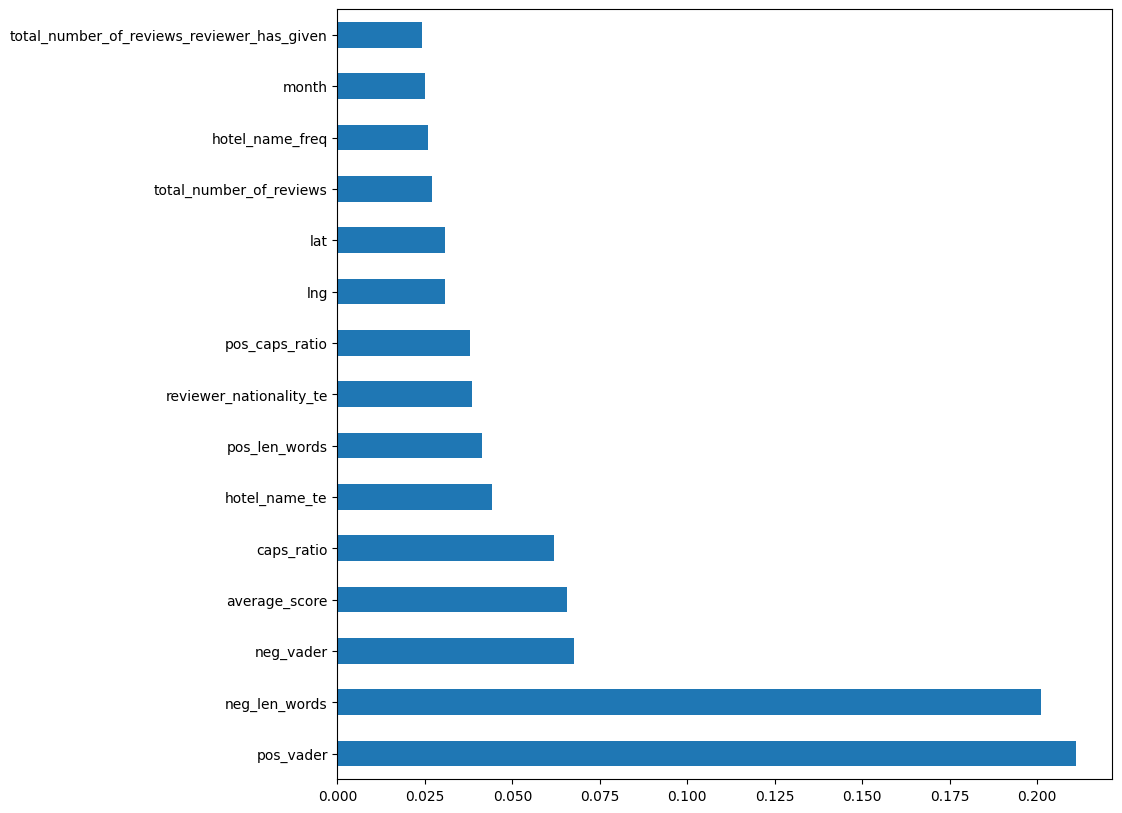

In [59]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [60]:
test_data.sample(10)

,average_score,total_number_of_reviews,total_number_of_reviews_reviewer_has_given,lat,lng,reviewer_score,city_Milan,city_Amsterdam,city_Barcelona,city_London,...,companion_solo_traveler,companion_family_with_young_children,companion_family_with_older_children,companion_group,stay_length_nan,room_type_Room,room_type_Suite,room_type_Studio,room_type_Apartment,room_type_nan
96014,8.3,3469,9,51.559095,-0.284704,0.0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,0
10939,9.0,2298,14,51.512196,-0.131838,0.0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
38278,8.8,2768,1,51.508354,0.019886,0.0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
56633,8.0,1069,5,51.505454,-0.226222,0.0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
97234,8.5,2279,4,48.204465,16.370240,0.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
107074,7.5,1774,8,45.458078,9.192421,0.0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
85627,9.3,174,3,48.863714,2.293476,0.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
56861,8.2,879,10,51.494851,-0.194554,0.0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
33372,8.8,1693,1,41.392018,2.157066,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
32839,9.1,3611,1,51.508404,-0.106799,0.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [61]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [62]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [63]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.9s finished


In [64]:
predict_submission

array([8.831, 7.173, 9.26 , ..., 7.883, 9.592, 7.278])

In [65]:
list(sample_submission)

['reviewer_score', 'id']

In [66]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.831,488440
1,7.173,274649
2,9.260,374688
3,9.744,404352
4,9.548,451596
5,8.782,302161
6,7.920,317079
7,7.188,13963
8,8.788,159785
9,7.764,195089
